<a href="https://colab.research.google.com/github/dani-lbnl/2022_als_user_meeting/blob/main/01_getstarted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALS User Meeting 2022
This notebook describes methods to extract key information from microCT image stacks
- Read images from different sources
- Show slices of a ndarray
- Plot a slice at random
- Determine stack size 

Created by Dani Ushizima, CAMERA, LBNL - Aug 1st 2022


In [38]:
%matplotlib inline

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte, io


# 1. Read a microct image
- from url
- from NERSC
- from Google drive

## Read from the web

In [41]:
#Get an image stack given a url
!wget https://github.com/dani-lbnl/imagexd19/blob/master/dip/data/bead_pack.tif?raw=true
!mv bead_pack.tif?raw=true bead_pack.tif

--2022-08-11 18:13:28--  https://github.com/dani-lbnl/imagexd19/blob/master/dip/data/bead_pack.tif?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dani-lbnl/imagexd19/raw/master/dip/data/bead_pack.tif [following]
--2022-08-11 18:13:29--  https://github.com/dani-lbnl/imagexd19/raw/master/dip/data/bead_pack.tif
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dani-lbnl/imagexd19/master/dip/data/bead_pack.tif [following]
--2022-08-11 18:13:29--  https://raw.githubusercontent.com/dani-lbnl/imagexd19/master/dip/data/bead_pack.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... con

In [42]:
#Double-check you got the image
!ls *.tif

bead_pack.tif


In [43]:
#Load the image
image = io.imread('bead_pack.tif')

In [44]:
#Check the size before plotting it
print('-----------------------------------------------------------------------')
print('Image shape is ',image.shape)
print('@CenterSlice: min=',image.min(),',mean=',np.around(image.mean(),decimals=2),',max=',image.max())
print('dtype = ',image.dtype)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Image shape is  (200, 200, 200)
@CenterSlice: min= 29 ,mean= 142.51 ,max= 239
dtype =  uint8
-----------------------------------------------------------------------


Text(0.5, 1.0, 'Slice98')

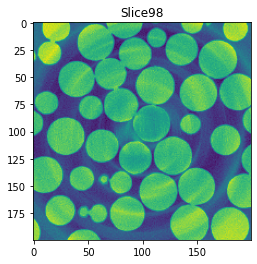

In [53]:
#Visualize one slice chose at random
import random
nmax = image.shape[0]
n = random.randint(0,nmax) # want a specific slice? change n 
plt.imshow(image[n,:,:])
plt.title('Slice'+str(n))

## Read from NERSC
- discard this portion if running in Colab

In [ ]:
datapath = "/global/cfs/cdirs/als/users/yourname/yourdata/" #update these values
!ls -lt "$datapath"

In [ ]:
image = io.imread(datapath+'bead_pack.tif')

## Read from Google drive 
- discard this portion if running at NERSC

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
datapath = "/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/"
!ls -lt "$datapath"

total 7842
-rw------- 1 root root 8025493 Aug 11 16:46 bead_pack.tif
drwx------ 2 root root    4096 Aug 11 16:35 concrete


In [30]:
image = io.imread(datapath+'bead_pack.tif')

# 2. How to read several tif files?
- assuming you have a folder with several tif files
- extension is tif and not tiff in this example

In [46]:
#Get the list of all files composing your stack
from glob import glob
extension = '*.tif'
slices = glob(datapath+'concrete/'+extension)
slices.sort()

In [37]:
print('Folder contains {} files'.format(len(slices)))

Folder contains 21 files


In [47]:
ic = io.ImageCollection(slices,conserve_memory=True) #well-suited for large collections 

(2560, 2560)

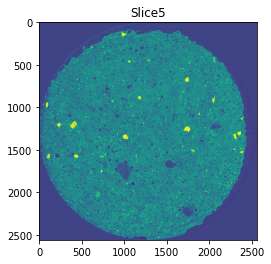

In [54]:
nmax = len(slices)
n = random.randint(0,nmax) # want a specific slice? change n 
plt.imshow(ic[n])
plt.title('Slice'+str(n))
plt.colorbar()
ic[n].shape

In [69]:
image2 = ic[0:10].concatenate()

In [70]:
image2.shape

(10, 2560, 2560)

In [71]:
from sys import getsizeof
print("Image size in mem: {}MB".format(round(getsizeof(image2) / 1024 / 1024,2)))

Mem size:62.5MB
